In [24]:
import tensorflow as tf

In [25]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<h3>Creating an interactive session</h3>

In [26]:
sess = tf.InteractiveSession()

<h3>Creating placeholders</h3>

Its always better to create placeholders before variable assignments. Here we'll create placeholders for inputs ("X") and outputs ("Y").   

<b>Placeholder 'X':</b> Input or the images. 
<ul>
    <li>Each input has 784 pixels distributed by a 28 width x 28 height matrix</li>   
    <li>The 'shape' argument defines the tensor size by its dimensions.</li>     
    <li>1st dimension = None. Indicates that the batch size, can be of any size.</li>     
    <li>2nd dimension = 784. Indicates the number of pixels on a single flattened MNIST image.</li>    
</ul>
    
<b>Placeholder 'Y':</b> Output or the labels.
<ul>
    <li>10 possible classes (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)</li>  
    <li>The 'shape' argument defines the tensor size by its dimensions.</li>    
    <li>1st dimension = None. Indicates that the batch size, can be of any size.</li>     
    <li>2nd dimension = 10. Indicates the number of targets/outcomes</li>   
</ul>



In [33]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

<h3>Assigning bias and weights to NULL tensors</h3>

In [34]:
W = tf.Variable(tf.zeros([784,10], tf.float32))
b = tf.Variable(tf.zeros([10]), tf.float32)

Initialize the variables

In [35]:
sess.run(tf.global_variables_initializer())

<h3>INPUT times WEIGHT add a BIAS activate!!!!</h3>

In [36]:
tf.matmul(x, W) +b

<tf.Tensor 'add_4:0' shape=(?, 10) dtype=float32>

<h3>Sorftmax Regression</h3>

In [37]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

### Cost Function

In [38]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

### Optimization: Gradient Descent

In [39]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### Training Batches

In [55]:
from tqdm import tqdm

for i in tqdm(range(100)):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x:batch[0], y_:batch[1]})

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 794.66it/s]


### Test

In [56]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc = accuracy.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels}) * 100
print("Accuracy: {} %".format(acc))

Accuracy: 91.90000295639038 %


In [65]:
sess.close()

## Deep Learning

- (Input) -> [batch_size, 28, 28, 1]  >> Apply 32 filter of [5x5]
- (Convolutional layer 1)  -> [batch_size, 28, 28, 32]
- (ReLU 1)  -> [?, 28, 28, 32]
- (Max pooling 1) -> [?, 14, 14, 32]
- (Convolutional layer 2)  -> [?, 14, 14, 64] 
- (ReLU 2)  -> [?, 14, 14, 64] 
- (Max pooling 2)  -> [?, 7, 7, 64] 
- [fully connected layer 3] -> [1x1024]
- [ReLU 3]  -> [1x1024]
- [Drop out]  -> [1x1024]
- [fully connected layer 4] -> [1x10]

In [1]:
import tensorflow as tf

# Start interactive session
sess = tf.InteractiveSession()

### Data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Initialize parameters

In [3]:
width = 28
height = 28
flat = width * height
class_output = 10

### Input and output

In [4]:
x = tf.placeholder(tf.float32, shape=[None,flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

### Converting images to tensors

In [7]:
x_image = tf.reshape(x, [-1, 28,28,1])

## Layers

#### Convolutional Layer 1
Here the shape of the filter is:<br>
[filter_height, filter_width, in_channels, out_channels]

In [9]:
W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,32], stddev = 0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # 32 biases for 32 outputs

We will use <b>tf.nn.conv2d</b> to create a convolutional layer. It will compute a 2D convolution over a 4D input and tensors<br>

Our inputs will be tensors of shape [batch, height, width, channels]. which is [batch_size, 28,28,1].<br>
After that a filter of shape [filter_height, filter_width, in_channels, out_channels]. W is of size [5,5,1,32] <br>
A stride which is [1,1,1,1]. Then the convolutional layer slides the kernel window across the input tensor. The convolution operates on a 2D window Shifts by in each of the dimensions. As the first and last dimensions are related to back and channels we set the stride to 1. But for the second and third dimension, we could set other values e.g [1,2,2,1]<br>

 
Process: <br>
Change the filter to a 2D matrix with shape [5*5*1, 32]<br>
Extract image patches from the input tensors to form a virtual tensor of shape [batch, 28,28,5*5*1]<br>
For each batch, right multipliers the filter matrix and the image vector<br>

In [10]:
convolve1= tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

#### Apply the relu activation function
Here we go through all the outputs from the convolution layer and wherever we get a negative value we swap it with a 0. It says that 
if f(x) is a ReLU activation function then $ f(x) = max(0,x) $

In [12]:
h_conv1 = tf.nn.relu(convolve1)

#### Apply the max pooling
max pooling is a form of non linear down sampling. IT partitions the input image into a set of rectangles and then finds the max value of that region. It helps in reducing the shape of the input, without affecting the depth.

In [13]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

### Second Convolutional Layer 

Here the input image is [14,14,32] and the filter is [5,5,32]

In [14]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [15]:
convolve2= tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2

In [16]:
h_conv2 = tf.nn.relu(convolve2)

In [17]:
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') #max_pool_2x2
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

### Fully connected layer

Then we will create a fully connected layer with softmax and generate probablities in the end. 

In [22]:
flattening_matrix = tf.reshape(conv2, [-1,7*7*64]) # Flattening the second convolution layer

W_fc1 = tf.Variable(tf.truncated_normal([7*7*64, 1024], stddev=0.1)) # fully connected layer weights
b_fc1 = tf.Variable(tf.constant(0.1, shape = [1024])) # need 1024 biases for 1024 outputs

fully_connected_layer = tf.matmul(flattening_matrix, W_fc1) + b_fc1

h_fc1 = tf.nn.relu(fully_connected_layer)

# To reduce overfitting
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)


# Softmax layer
W_fc2 = tf.Variable(tf.truncated_normal([1024,10], stddev = 0.1)) # 1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # for 10 outputs

fc = tf.matmul(layer_drop, W_fc2) + b_fc2

y_cnn = tf.nn.softmax(fc)


### Loss function and Train the model

In [27]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_cnn), reduction_indices = [1]))

### Optimizer

In [28]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

### Prediction

In [29]:
correct_prediction = tf.equal(tf.argmax(y_cnn, 1), tf.argmax(y_,1))

### Accuracy

In [30]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Run session and train

In [33]:
sess.run(tf.global_variables_initializer())

In [35]:
from tqdm import tqdm # Just for visualizing the for loop

In [36]:
for i in tqdm(range(1000)):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict = {x:batch[0], y_:batch[1], keep_prob: 1.0})
        print("Step: %d , Training Accuracy : %g" % (i, float(train_accuracy)))
    train_step.run(feed_dict={x:batch[0], y_: batch[1], keep_prob: 0.5})

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

Step: 0 , Training Accuracy : 0.18


 10%|███████▉                                                                       | 100/1000 [00:15<02:09,  6.95it/s]

Step: 100 , Training Accuracy : 0.92


 20%|███████████████▊                                                               | 200/1000 [00:31<02:09,  6.18it/s]

Step: 200 , Training Accuracy : 0.94


 30%|███████████████████████▋                                                       | 300/1000 [00:49<02:04,  5.61it/s]

Step: 300 , Training Accuracy : 0.94


 40%|███████████████████████████████▌                                               | 400/1000 [01:08<02:01,  4.92it/s]

Step: 400 , Training Accuracy : 0.96


 50%|███████████████████████████████████████▌                                       | 500/1000 [01:27<01:27,  5.72it/s]

Step: 500 , Training Accuracy : 0.92


 60%|███████████████████████████████████████████████▍                               | 600/1000 [01:46<01:40,  3.97it/s]

Step: 600 , Training Accuracy : 0.9


 70%|███████████████████████████████████████████████████████▎                       | 700/1000 [02:05<00:55,  5.42it/s]

Step: 700 , Training Accuracy : 0.94


 80%|███████████████████████████████████████████████████████████████▏               | 800/1000 [02:23<00:36,  5.48it/s]

Step: 800 , Training Accuracy : 0.88


 90%|███████████████████████████████████████████████████████████████████████        | 900/1000 [02:42<00:18,  5.49it/s]

Step: 900 , Training Accuracy : 0.94


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:00<00:00,  5.84it/s]


## Evaluation

In [38]:
n_batches = mnist.test.images.shape[0] // 50
cumulative_accuracy = 0.0
for index in tqdm(range(n_batches)):
    batch = mnist.test.next_batch(50)
    cumulative_accuracy += accuracy.eval(feed_dict = {x: batch[0], y_:batch[1], keep_prob: 1.0})
print("Test accuracy {}".format(cumulative_accuracy / n_batches))

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.43it/s]


Test accuracy 0.9640000015497208


## Visualization of the filters and layers
<br>
 
The image below shows all the 5x5 kernels used in the first convolutional layer

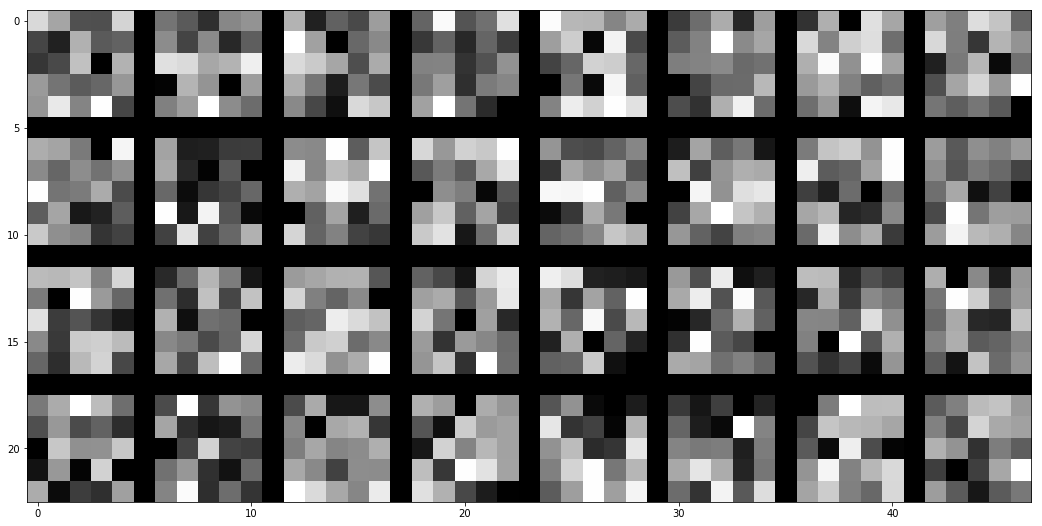

In [44]:
import utils
from utils import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2, 3, 0,1]),[32, -1]))

image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray') 

Output of the image through the first convolutional layer

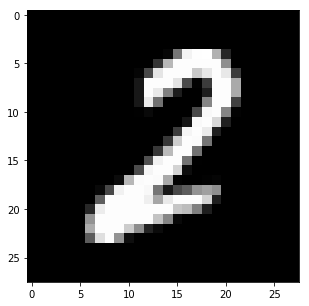

In [46]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = mnist.test.images[5]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

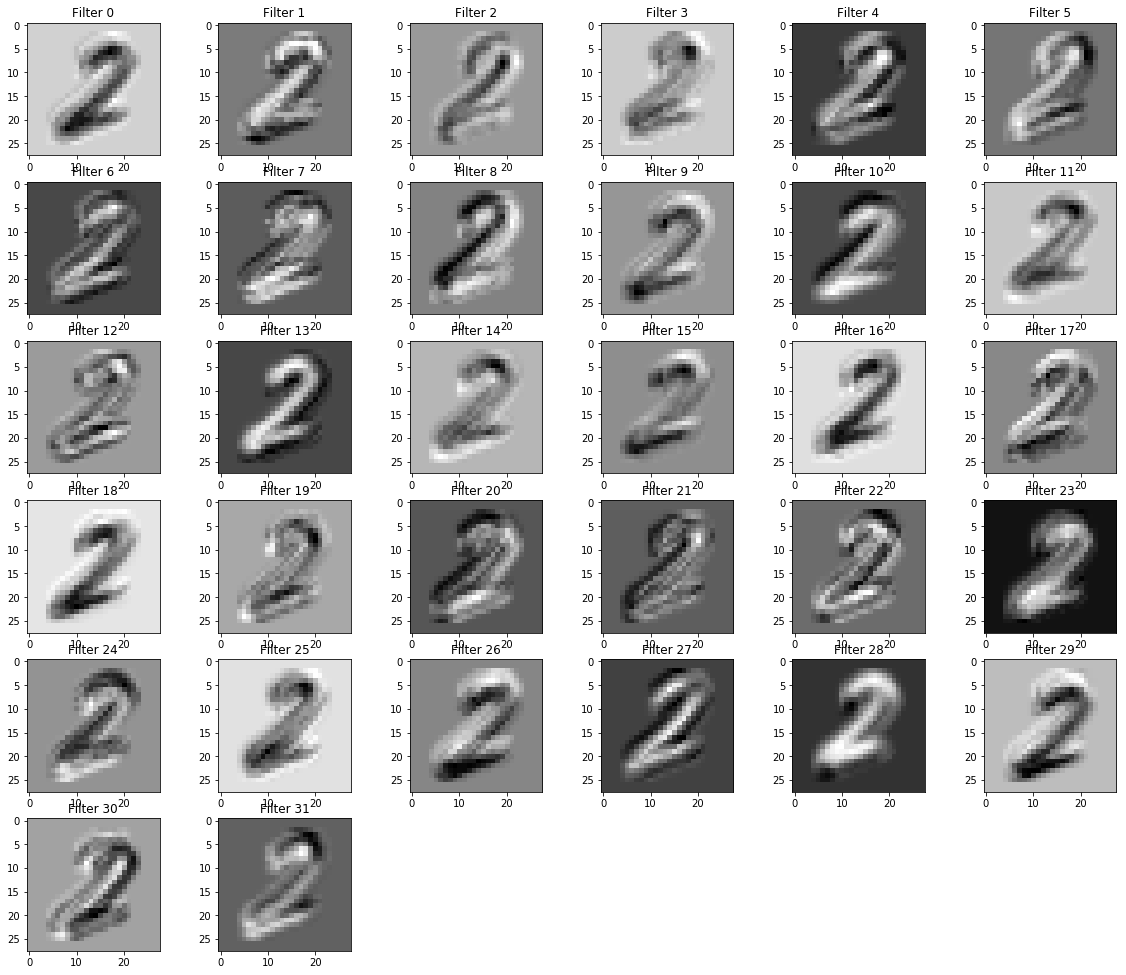

In [47]:
ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

Second Convolutional Layer

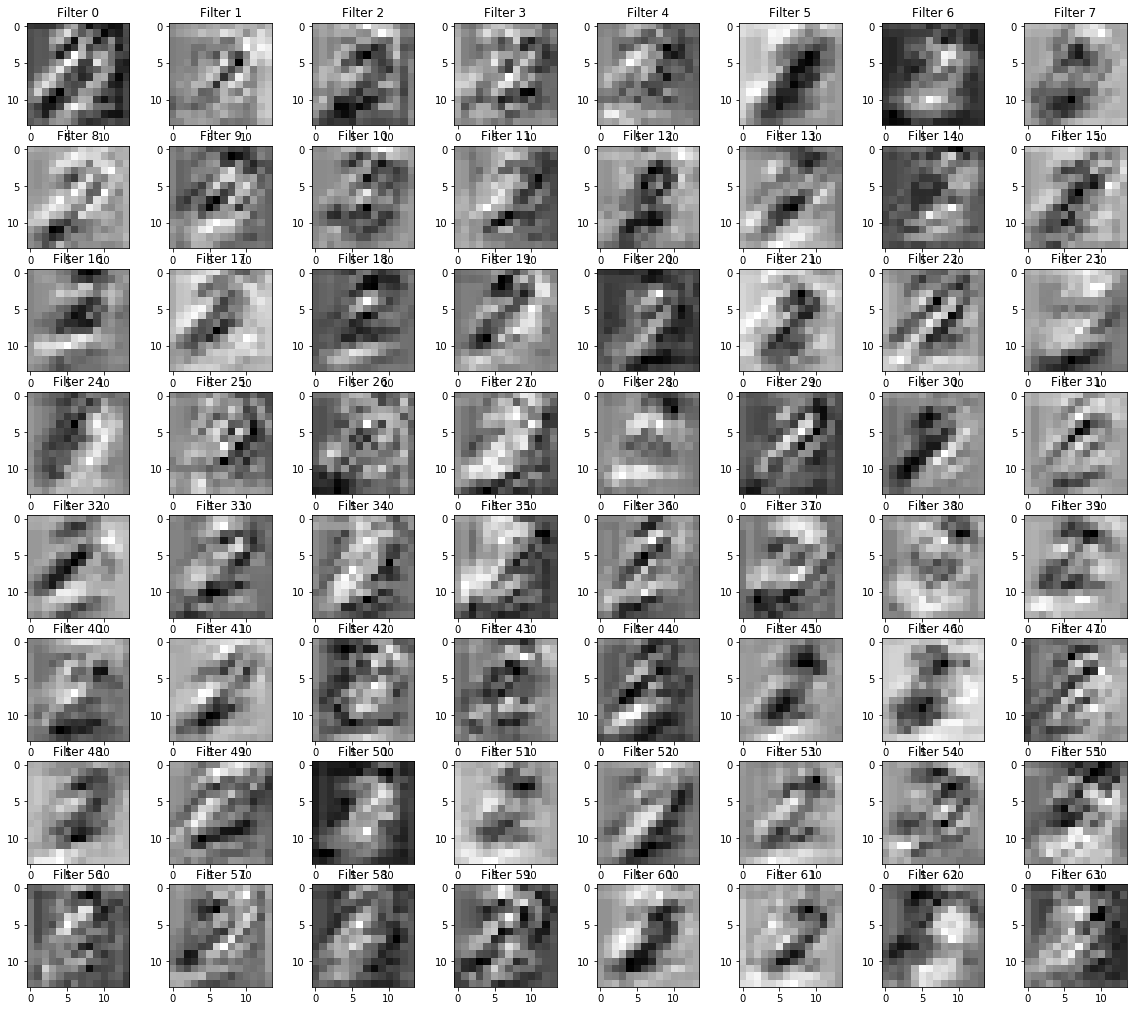

In [48]:
ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [50]:
sess.close()

<h1>_______________________________________________________</h1>